In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [88]:
creditcard_df = pd.read_csv('CC GENERAL.csv')

In [89]:
creditcard_df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<AxesSubplot:>

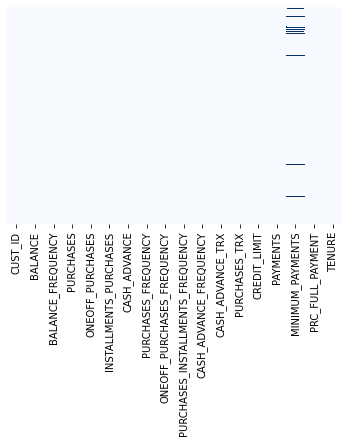

In [90]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False ,cbar = False,cmap='Blues')

we will calculate the mean of minimum payments column the place it into all null values in it

In [91]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [92]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [93]:
creditcard_df.duplicated().sum()

0

In [94]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [95]:
# Here we drop un wanted data from the data set
n = len(creditcard_df.columns)
n

17

In [96]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\i\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\i\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\i\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

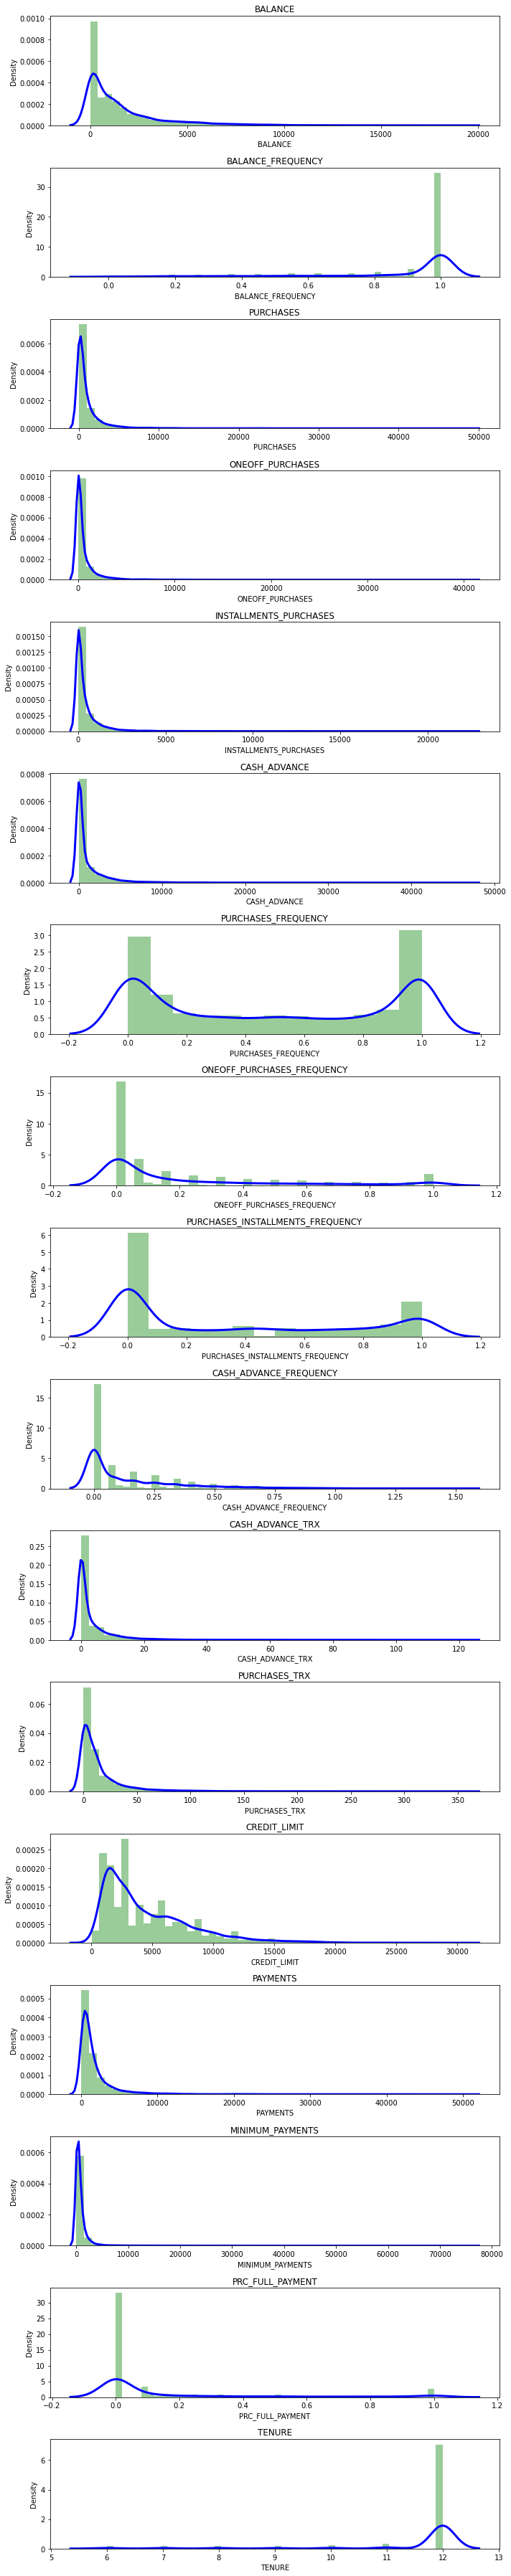

In [97]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()

In [98]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [99]:
creditcard_df_scaled.shape

(8950, 17)

In [100]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [107]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [108]:
kmeans.cluster_centers_.shape

(7, 17)

In [109]:
cluster_centers  = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.697253,-2.127783,-0.318414,-0.236641,-0.318034,-0.306503,-0.566971,-0.433855,-0.462119,-0.482567,-0.357761,-0.428154,-0.218692,-0.223844,-0.255515,0.245401,-0.164052
1,-0.150421,0.386100,0.440825,0.575385,-0.014875,-0.327035,0.924451,1.823542,0.103312,-0.390183,-0.315092,0.511506,0.363397,0.078751,-0.160189,0.363574,0.182281
2,0.003395,0.373146,-0.365322,-0.248967,-0.406318,-0.059938,-0.884653,-0.415687,-0.773903,0.167209,-0.005058,-0.493717,-0.332329,-0.262316,-0.018143,-0.455288,-0.007185
3,0.909396,0.467818,2.243364,1.723677,2.137733,-0.195806,1.160440,1.550954,1.232270,-0.312283,-0.212987,2.749368,1.219570,1.274097,0.598255,0.291923,0.334613
4,-0.395580,0.309449,-0.064128,-0.257212,0.320867,-0.361839,0.977937,-0.413911,1.174507,-0.463958,-0.358841,0.137941,-0.317227,-0.244230,-0.072957,0.357281,-0.020482
5,1.638373,0.376468,-0.217889,-0.154150,-0.232066,2.001968,-0.470347,-0.207727,-0.416534,1.928591,1.896393,-0.270432,0.994266,0.777551,0.486979,-0.391082,-0.097201
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [110]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,113.202582,0.373219,322.908043,199.662072,123.473753,336.119737,0.262798,0.073030,0.180779,0.038578,0.807368,4.067536,3698.759704,1085.137162,268.739114,0.225490,11.297774
1,1251.385571,0.968734,1945.034036,1547.459363,397.616304,293.063721,0.861377,0.746456,0.405496,0.057065,1.098556,27.423959,5816.634742,1961.120248,490.893312,0.260054,11.761257
2,1571.541312,0.965666,222.689675,179.202759,43.639562,853.179107,0.135297,0.078450,0.056868,0.168604,3.214310,2.437864,3285.301837,973.764954,821.923984,0.020551,11.507703
3,3457.306120,0.988093,5796.186419,3453.388512,2344.193256,568.257262,0.956091,0.665137,0.854173,0.072653,1.795349,83.048837,8931.744186,5421.530758,2258.415474,0.239097,11.965116
4,741.108955,0.950576,866.193725,165.517803,701.223298,220.077515,0.882844,0.078980,0.831217,0.042302,0.800000,18.138532,3340.246965,1026.122671,694.182216,0.258213,11.489908
5,4974.609831,0.966453,537.681903,336.580550,201.213201,5177.090565,0.301577,0.140489,0.198896,0.521075,16.190319,7.987899,8111.996200,3984.076637,1999.089586,0.039330,11.387239
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [111]:
labels.shape

(8950,)

In [113]:
labels.max()

6

In [114]:
labels.min()

0

In [115]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 6, 2, ..., 0, 0, 0])

In [119]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


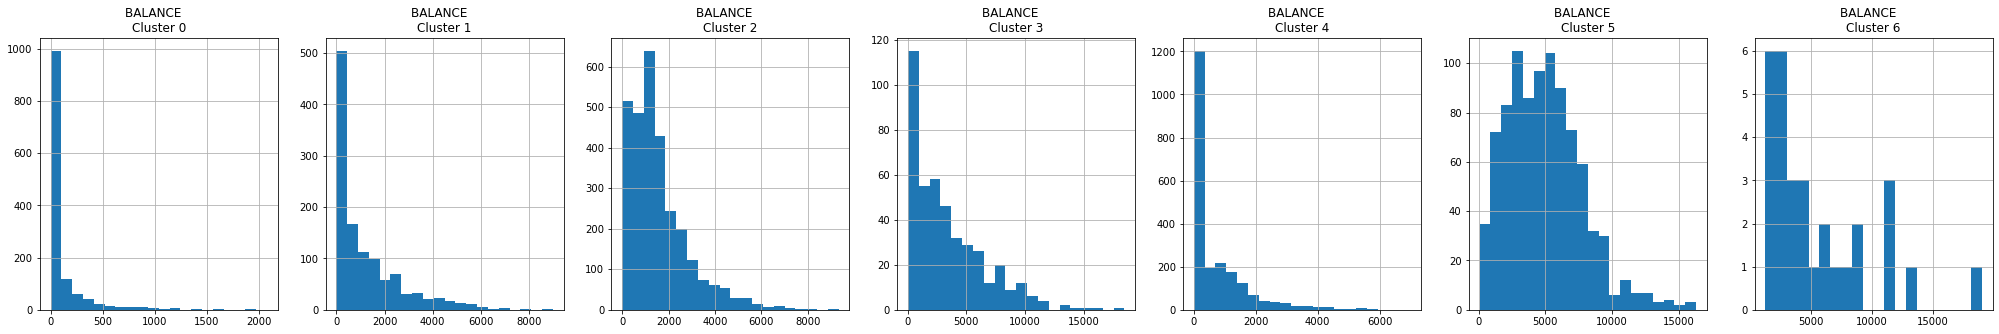

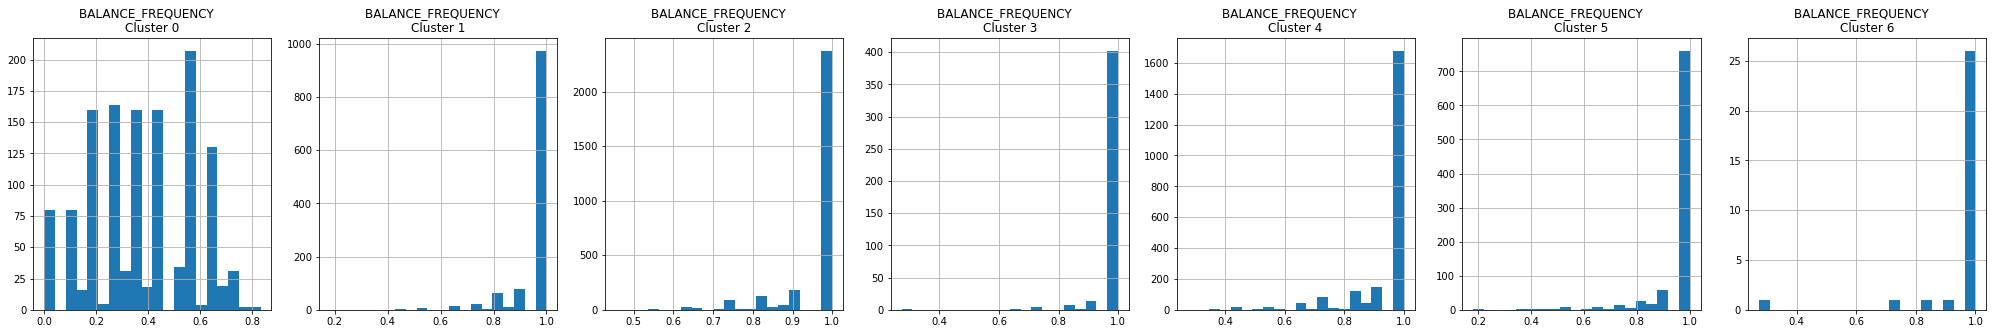

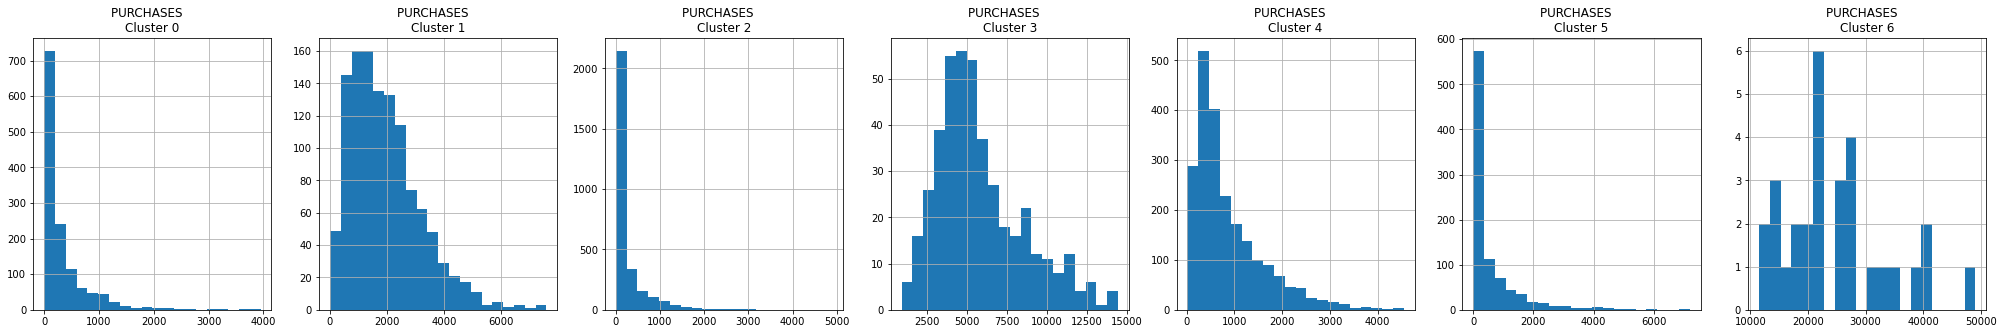

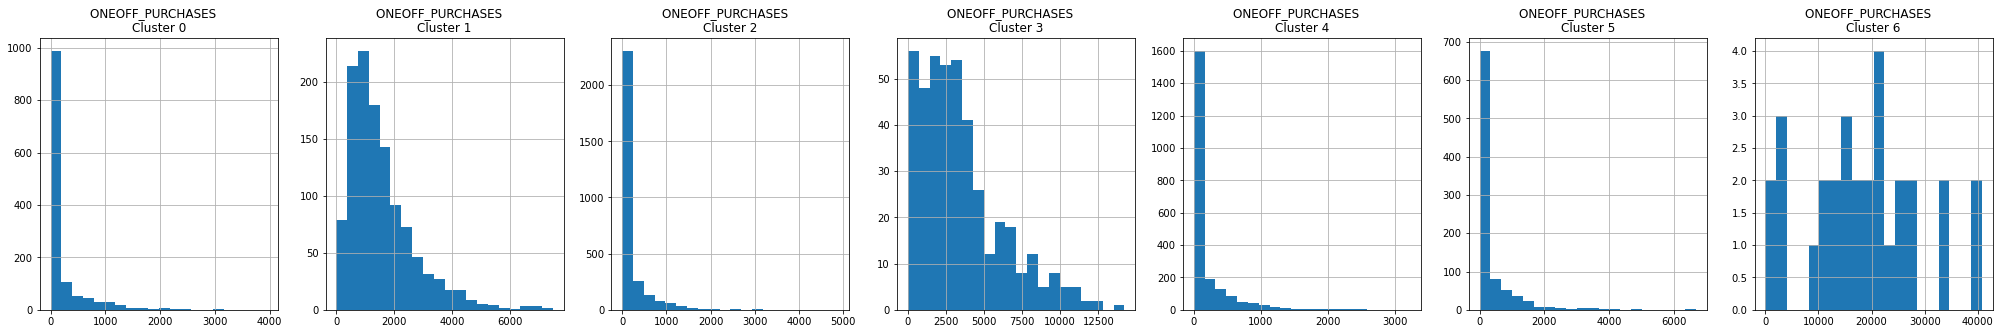

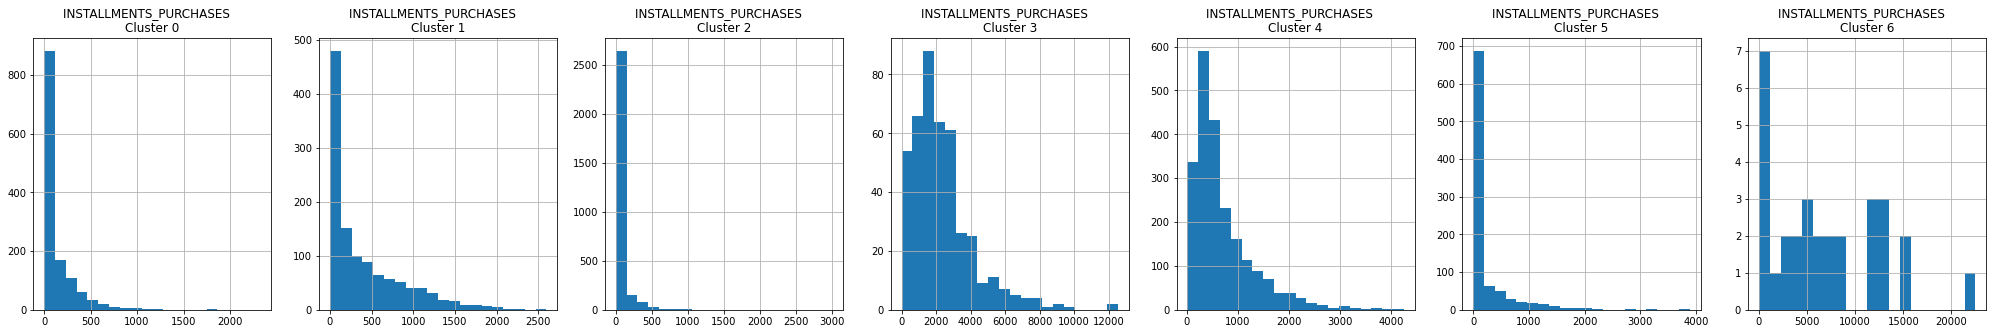

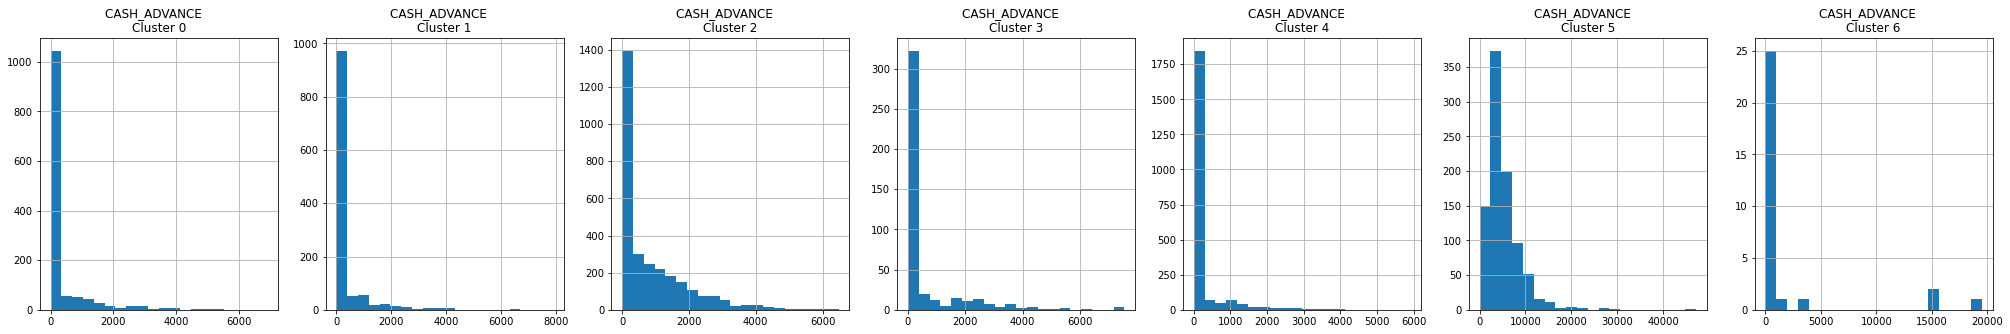

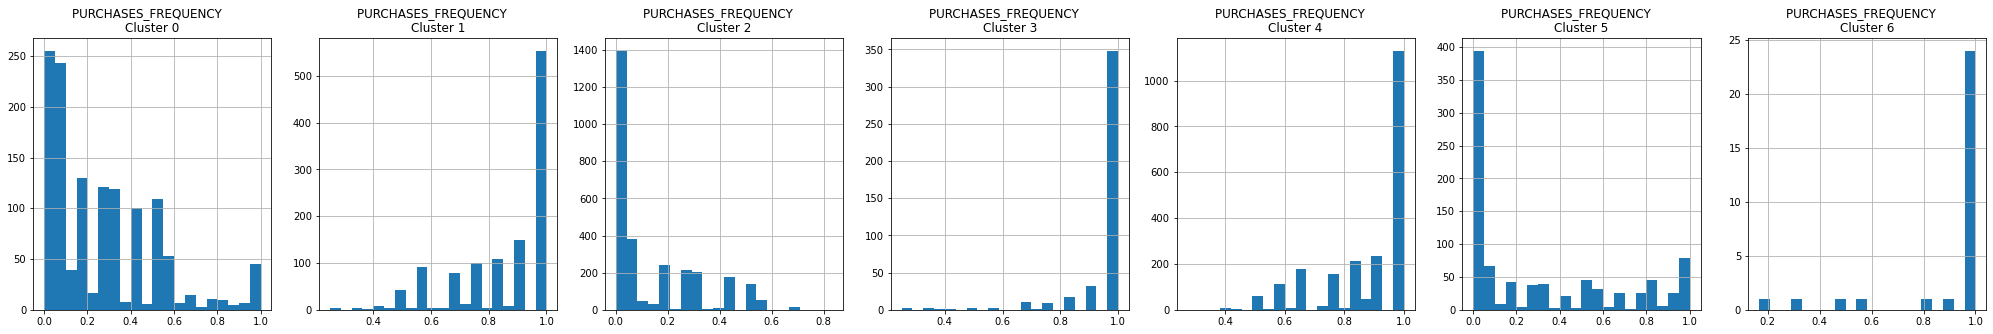

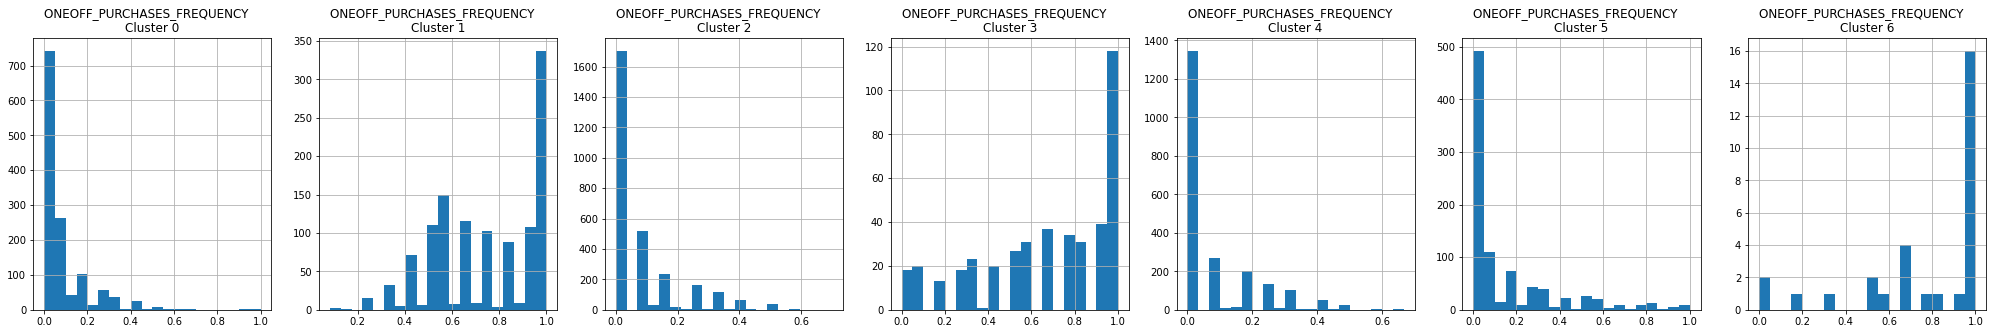

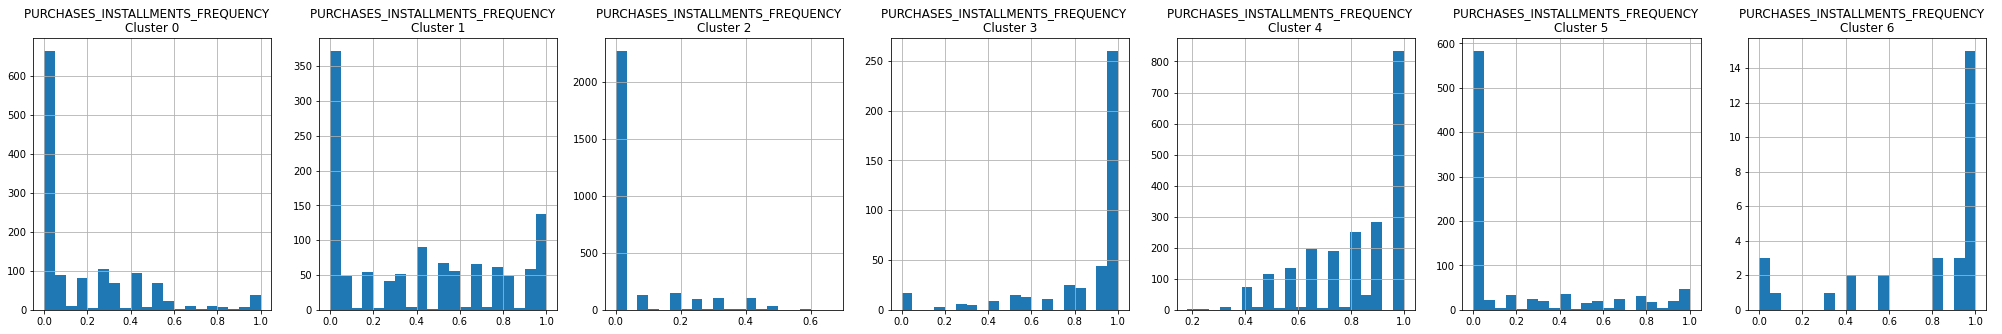

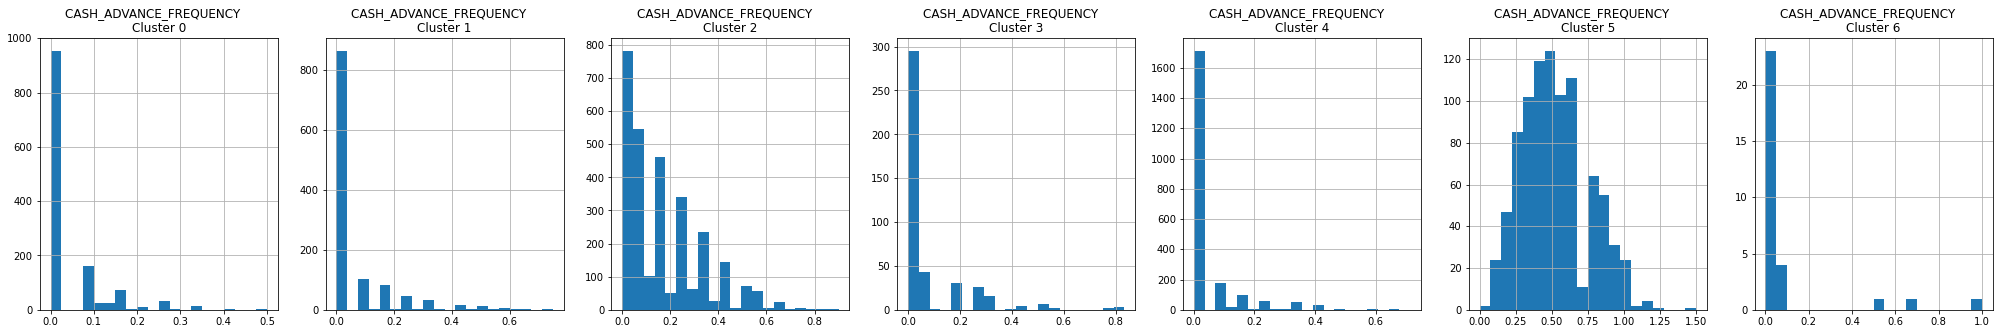

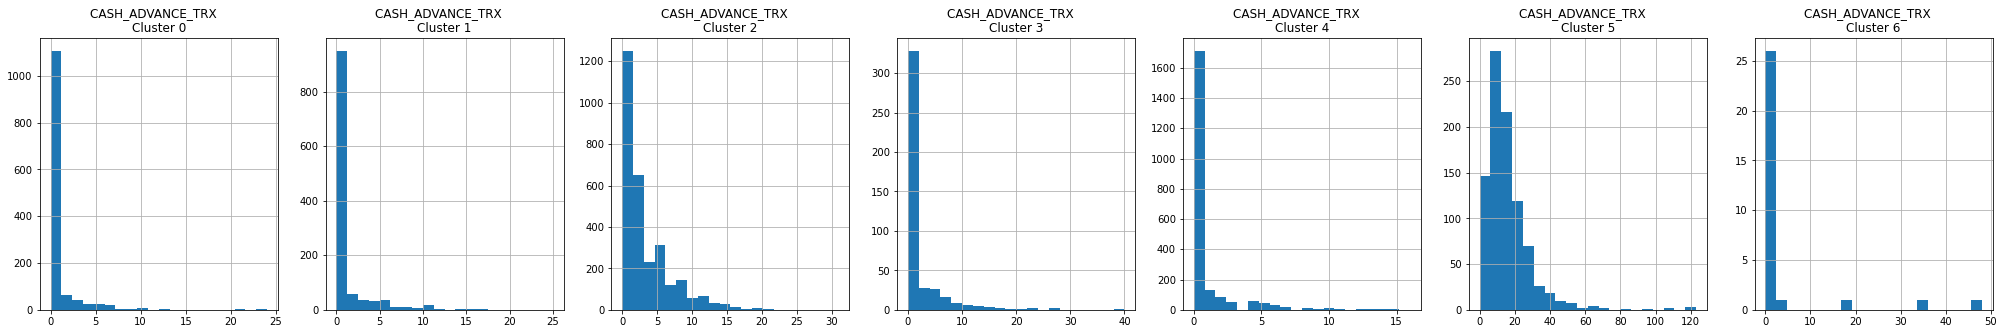

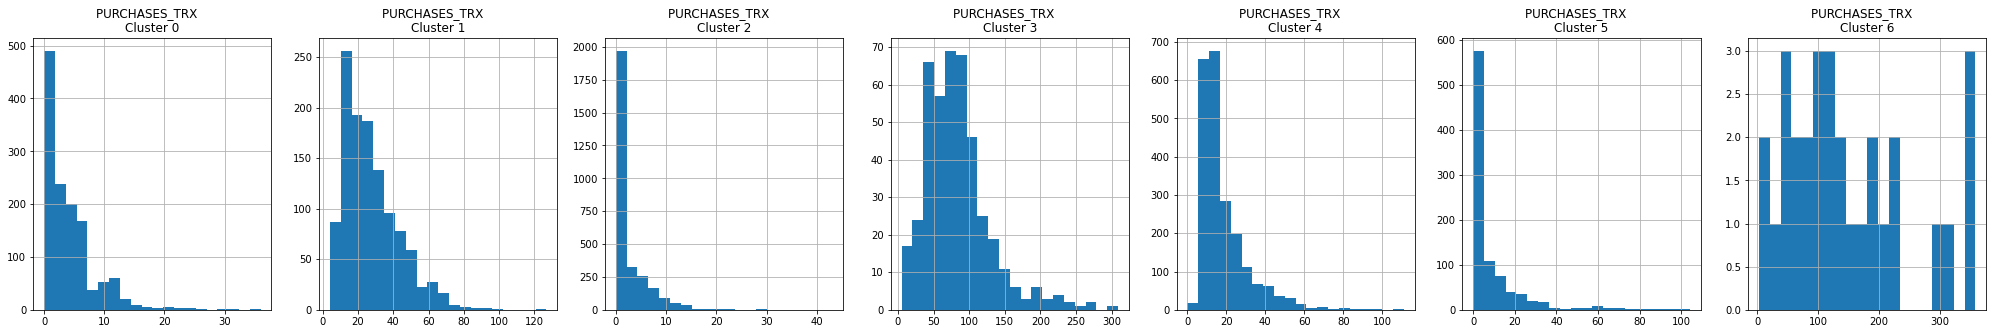

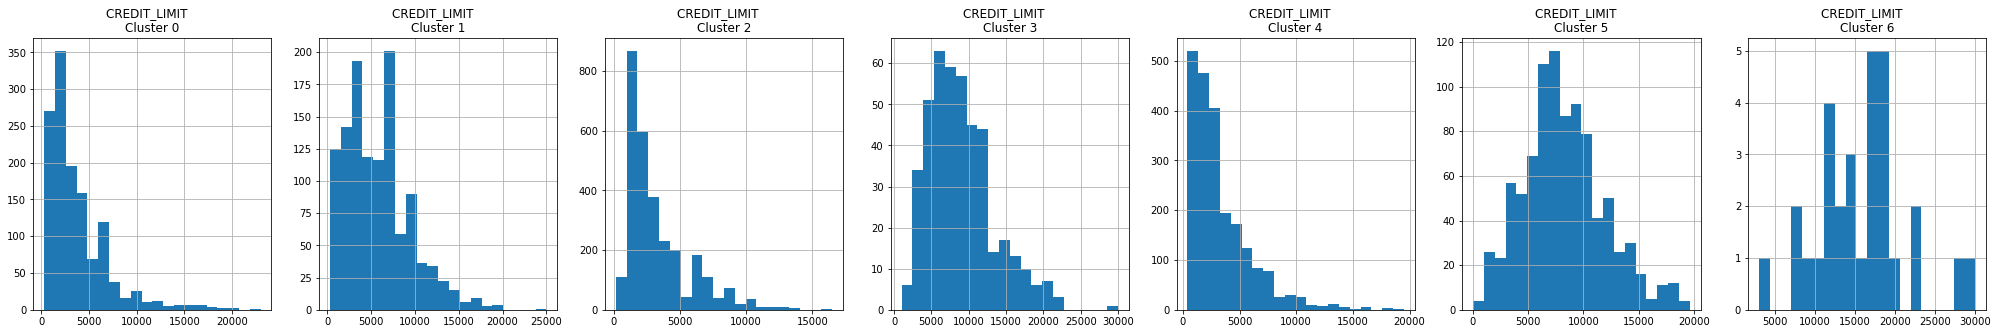

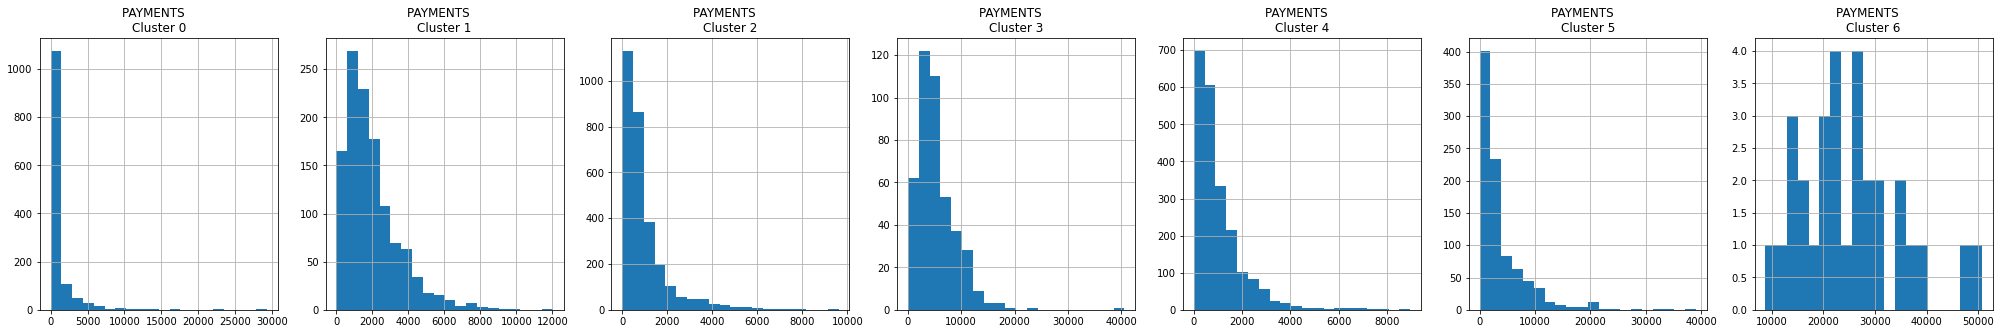

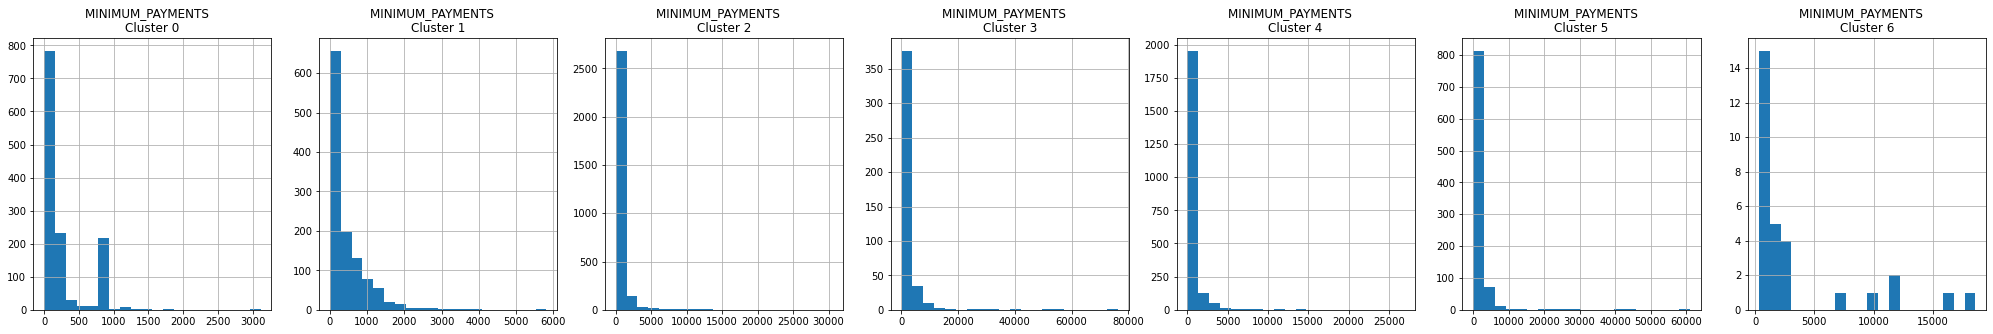

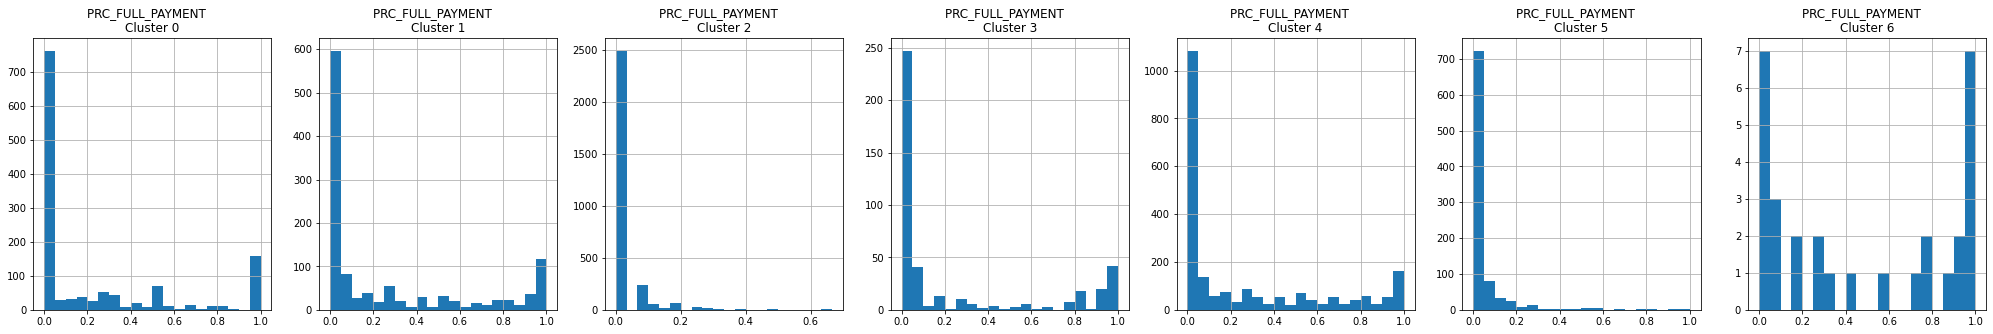

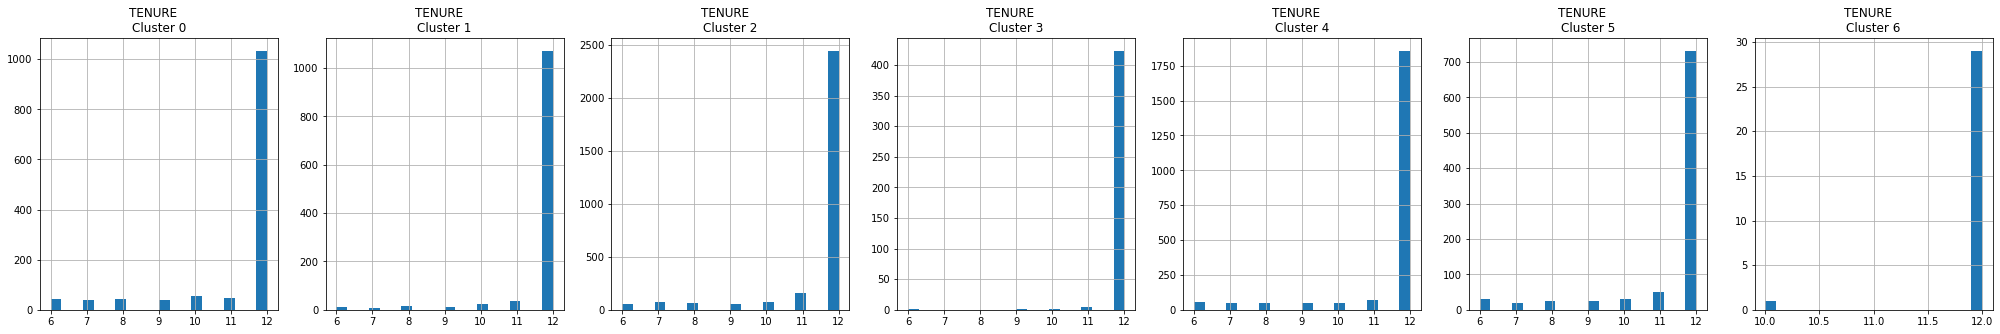

In [123]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']== j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {}'.format(i,j))
    plt.show()

In [125]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221658, -1.07642014],
       [-1.13828335,  2.50657973],
       [ 0.96966984, -0.38363078],
       ...,
       [-0.9262028 , -1.81078311],
       [-2.33654423, -0.65791296],
       [-0.55642616, -0.4005018 ]])

In [126]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682217,-1.076420
1,-1.138283,2.506580
2,0.969670,-0.383631
3,-0.873628,0.043170
4,-1.599430,-0.688551


In [127]:
#conctinate the labes
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster': labels})],axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682217,-1.076420,2
1,-1.138283,2.506580,5
2,0.969670,-0.383631,1
3,-0.873628,0.043170,2
4,-1.599430,-0.688551,2


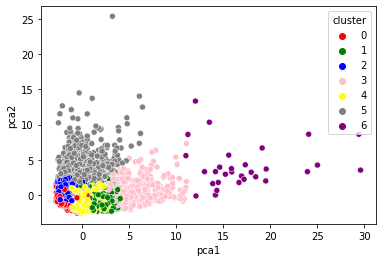

In [128]:
plt.figsize=(10,10)
ax =sns.scatterplot(x='pca1',y='pca2',hue='cluster',data =pca_df,palette=['red','green','blue','pink','yellow','gray','purple'])
plt.show()

In [132]:
#to fignd avegrage and minum, max ammount
creditcard_df['BALANCE'].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

<AxesSubplot:>

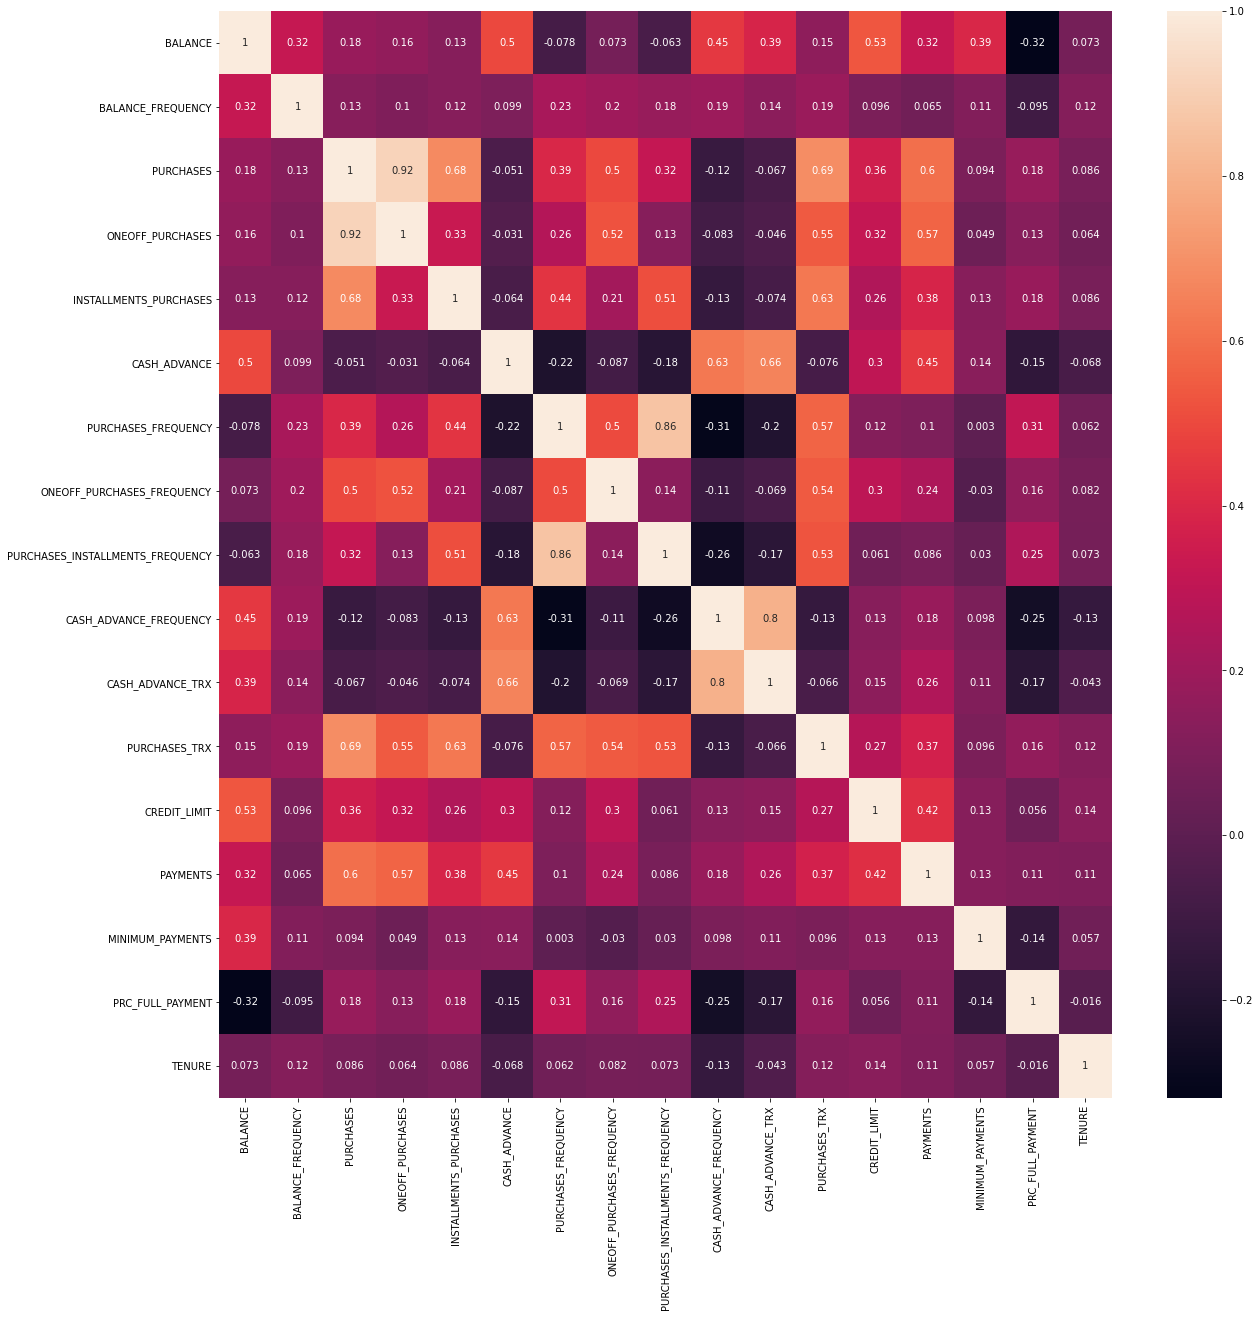

In [135]:
# to check co relation heat map
corelaton = creditcard_df.corr()
f ,ax =plt.subplots(figsize =(20,20))
sns.heatmap(corelaton,annot=True)